<!-- ![Experimental Setup](https://raw.githubusercontent.com/JBusink/Nummerical-Differentiation/main/Figures/Experimental_setup_biomechanics_pendulum_100dpi.png) -->
# General information
 * Author: Joris Busink, Junior Teacher Physics Education.
 * Date: Thu, 23th March.
 * About: Data processing script for high-speed camera. 

 For questions and suggestions please email:<br>
 J.Busink@vu.nl.<br>

# Example: Analysis of a pendulum (SHO) using a high speed camera


<a href='#model'> 1. Model description.</a><br>
<a href='#loadpackages'> 2. Load packages.</a><br>
<a href='#data'> 3. Import data.</a><br>
<a href='#plot'> 4. Plot data.</a><br>
<a href='#fit'> 5. Fit data to model.</a><br>
<a href='#derivative'> 6. Calculate derivatve.</a><br>

## Model <a id='model'></a>

In this experiment, I took data from a simple (harmonic) pendulum using a high speed camera. The data shows us the x-coordinate of the position of the mass.<br>
We can describe the x-position using Newton’s second law of motion and performing a force analysis. 

Using a force analysis we arrive to the following differential equation:

\begin{equation}
    \frac{d^2\theta}{dt^2} +\frac{g}{l}\sin{(\theta)} =0
    \tag{1}
\end{equation}

If we assume that the (initial) angle is very small, we can approximate $\sin{\theta} \approx \theta$ and we arrive at

\begin{equation}
    \frac{d^2\theta}{dt^2} +\frac{g}{l} \theta =0.  
    \tag{2}
\end{equation}

By integrating the second-order differential equation we find the following solution:

\begin{equation}
    \theta(t) = A\sin(\omega t +\phi) +\theta_0,
    \tag{3}
\end{equation}

with $\omega^2 =\frac{g}{l}$ and assuming $\dot{\theta}(t=0) = 0$. 

Finally, in the reference frame of the camera (figure below), we find:<br>

\begin{equation}
    x(t) = A\sin(\omega t +\phi)+x_0.
    \tag{4}
\end{equation}

A is the amplitude of the pendulum (in the x-direction), $\omega$ is the frequency of the pendulum. 
The frequency depends on the ratio of the gravitational acceleration $g$ and the length of the cord $l$ ($0.58 \pm 0.01$ m). <br>
$\phi$ is an arbitrary phase of the oscillation and $x_0$ is the initial position recorded by the camera.<br>

Note that we assumed $\sin{\theta}\approx\theta$, this is something that we should treat with great care during the experiment.<br> Futhermore, we assumed that we release the pendulum with with zero initial angular velocity ($\dot{\theta}(t=0)=0$), check this!

![Simple Pendulum](https://raw.githubusercontent.com/JBusink/Nummerical-Differentiation/main/Figures/single_pendulum_xva_100dpi.png)

## Load packages <a id='Loadpackages'></a>
I load the following packages: 
* [Numpy](https://numpy.org), numerical Python.<br> 
* [Matplotlib](https://matplotlib.org).pyplot, for creating static, animated, and interactive visualizations in Python.<br>
* [Pandas](https://pandas.pydata.org). A fast and efficient library to handle DataFrame objects.<br>

We need these packages to analyze, plot and fit our data. These packages are in<br>
genereal very useful in doing numerical calculations with Python. Furthermore I imported os to set a<br>
working directory.

In [16]:
# %matplotlib widget #requires package ipympl installed, for interactive plots.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
np.set_printoptions(precision=4,threshold =9,suppress=True)  #Compact display of arrays.


/Users/jbusink/Documents/GitHub/Nummerical-Differentiation


## Load, read and filter data from high speed camera <a id='data'></a>
In this section we load, read and filter the data from the high speed camera. <br>
The output data is a .mqa extension, this is a program specific extension used by the tracking software.<br>
This extension is not a problem for Python 3 to handle.

 * Line 1: make dataframe 'df' that contains all data.<br>

 * Line 3-5: change the numerical separator from a comma to a dot (In the Netherlands we use comma for numbers, international standard is a dot.). This is optional.<br>

 * Line 11-12: remove "Not-a-Number", nan, values from the list.<br>

 * Line 14-17: make a subselection of the data. Handling large datafiles can be very slow and annoying. This is optional ofcourse. Lastly, I need to rescale my camera-data from pixels to meters.
<br>


In [17]:
path = 'path/to/file.extension'
df=pd.read_csv(path, sep='\t',header=0)

# Time = df['Time'].str.replace(',', '.').astype(float).to_list()
# Xpos = df['Point #1.X'].str.replace(',', '.').astype(float).to_list()
# Ypos = df['Point #1.Y'].str.replace(',', '.').astype(float).to_list()

Time = df['Time'] #comment if data is comma delimited.
Xpos = df['Point #1.X'] #comment if data is comma delimited.
Ypos = df['Point #1.Y'] #comment if data is comma delimited.

Xpos = [x for x in Xpos if str(x) != 'nan']
Ypos = [x for x in Ypos if str(x) != 'nan']

scaling = 1/1010 #scaling factor from pixel to [m]
t=np.asarray(Time[:15000]) 
x = np.asarray(Xpos[0:15000])*scaling 
y = np.asarray(Ypos[0:15000])*scaling 

## Plot the data <a id='plot'></a>
Here I plot the raw pendulum data. On the y-axis I plot the x-position (m) of pendulum, on the x-axis I plot the time (s). <br>
I also added labels, limits and a title. These options are assumed to be self-explanatory.

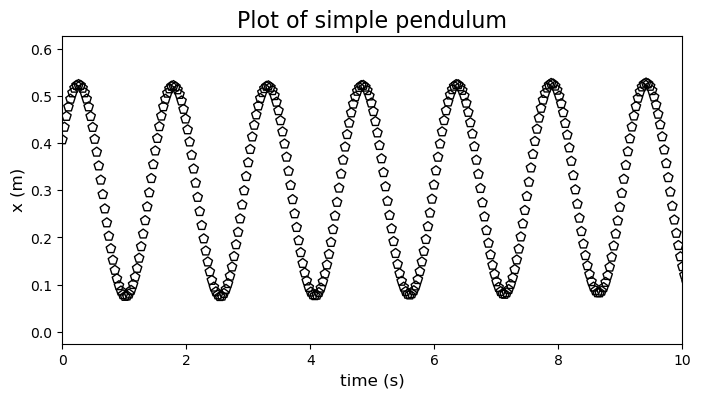

In [18]:
fig, axes = plt.subplots(1,1,figsize=(8,4)) #Creates a single figure with dimensions (8 by 4 (inch))
axes.scatter(t[::10],x[::10] ,color = 'black', s = 50, marker ='p',ec='black',fc='none') #plot every tenth datapoint t[::10].

#plot axis labels,title and adjust limits
axes.set_title('Plot of simple pendulum',fontsize=16)
axes.set_xlabel('time (s)',fontsize=12)
axes.set_ylabel('x (m)',fontsize=12)
axes.set_xlim(0,10)
axes.set_ylim(np.min(x)-0.1,np.max(x)+0.1)

plt.show()

## Fit data to model <a id='fit'></a>
We want to fit our model, equation 4, to our data, we use the scipy.optimize libary, and in particular<br>
we use the Curve_fit function. 

* Line 1-2: Here we define our model (sinus_model()) using a Python function: a function starts with <em>def</em> and ends with 
<em>return</em>.<br>

Sinus_model() is our user defined model based on the theory. We vary the time coordinate (the independent variable, t) and the parameters ($x_0$, A, $\omega$ and $\phi$) are determined by a fit.<br> 
Be careful that the independent variable (t) must appear<em> before </em> the parameters, otherwise an error message will appear.<br>

* Line 4: Apply a fit using the curve_fit function. [Curve_fit documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)<br>

Curve_fit asks for a minimum of three input arguments (model, independent variable (t), dependent variable (x)), more input arguments are optional.<br> 
In our case, I provide an initial guess of the optimal parameters ($p_0$) and I provide bounds to the parameters. Other options include: weights, method, etc. <br>
Note that providing a good initial guess of $p_0$ and apply parameter bounds significantly reduces the complexity of finding the optimal parameters, if possible, provided them!<br>
<br>
The output of curve_fit are the optimal parameters <em>popt</em> and the covariance matrix $\mathcal{K_{p_i p_j}}$ <em>pcov</em>.
To obtain the standard deviation $\sigma_{a}$ of parameter a we take the square root of the variance

\begin{equation}
    \sigma_{a} = \sqrt{s_{p_a p_a}}
    \tag{6}
\end{equation} 

* Line 6-8: Show the optimal values and corresponding standard deviations. <br>

In [ ]:
from scipy.optimize import curve_fit

def sinus_model(t,x0,A,omega,phi):
    return x0+A*np.sin(omega*t+phi)

popt, pcov = curve_fit(sinus_model,t,x,p0=[0.3,0.23,4.12,0.5],bounds = ([0.1,0.2,2,0],[0.5,0.5,10,2*np.pi]))

parameter=['Offset (m)', 'Amplitude (m)', 'Frequency (rad/s)', 'phase (rad)']
for i in range (4):
    print("The optimal value for ", parameter[i], 'is:', "{:.2f}".format(popt[i]), '\u00B1', "{:.5f}".format(np.sqrt(pcov[i,i])))

The optimal value for  Offset (m) is: 0.30 ± 0.00003
The optimal value for  Amplitude (m) is: 0.22 ± 0.00005
The optimal value for  Frequency (rad/s) is: 4.12 ± 0.00002
The optimal value for  phase (rad) is: 0.48 ± 0.00043


* Line 10-15: Make figure, plot the data (black) and the fit (orange).<br>

We plot the fit by making a new dataset, called tfit. We evaluate the the function using the optimal parameters at the values of tfit.

* Line 17-25: Optional commands. <br>

* Line 27-28: Save the figure.<br> 

Note that the figure is saved as a .svg extension. A .svg extension stands for Scalable Vector Image, the image is saved as an object (and not as a collection of pixels). <br>
One can import .svg picture in e.g. inkscape, powerpoint or adobe photoshop to manipulate these, try it!.<br>

* Line 35-37: Calculation of the gravitational acceleration, the error on g is calculated using the general rules for error propagation.

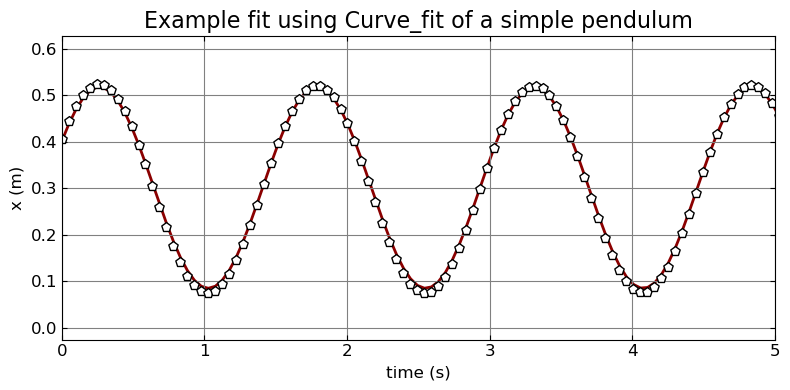

The gravitational acceleration g [$m/s^2$] =  9.84 ± 0.17


In [20]:
xfit = np.linspace(0,max(t),1000) #create new data for fit.

#Plot data + fit        
fig,axes=plt.subplots(1,1,figsize=(8,4),sharex=True,sharey=True)
axes.plot(xfit,sinus_model(xfit,*popt), color ='darkred', lw = 2,zorder =1) #plot fit
axes.scatter(t[::15],x[::15] ,color = 'black', s = 50, marker ='p',ec='black',fc='white',zorder=2) #plot every 15th datapoint 

#plot axis labels and limits
axes.set_title('Example fit using Curve_fit of a simple pendulum',fontsize=16)
axes.set_xlabel('time (s)',fontsize=12)
axes.set_ylabel('x (m)',fontsize=12)
axes.set_xlim(0,5)
axes.set_ylim(np.min(x)-0.1,np.max(x)+0.1)

#Some plot settings
axes.tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
axes.grid(True,color='gray')
plt.tight_layout() #creates optimal padding levels for figure (especially usefull for side-by-side figures)

# location='Path' #Path to your prefered location, e.g. User/Downloads/
# plt.savefig(location+'simple_pendulum.svg') #Extension can be .png/.jpg/.etc or .svg/.pdf (Vector Image)

plt.show()

#Calculate g + error
l,omega,dl,domega=0.58,popt[2],0.01,np.sqrt(pcov[2][2])
print('The gravitational acceleration g [$m/s^2$] = ', "{:.2f}".format(omega**2*l), "\u00B1",
      "{:.2f}".format(np.sqrt((2*omega*l*domega)**2+(omega**2*dl)**2)))

## Optional! Residuals
In the previous section we fit a model to our data. As expected, the sinusoidal model captures the data very well.<br>

However, we might also be interested in the limitations of the model. To spot these limitations can be cumbersome,<br> 
an elegant strategy is to calculate the difference between the data and the fit: the residuals.<br>
To visualize the residuals I will make an extra figure above the main panel. I use [gridspec](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html) to create this extra panel.<br>
Using gridspec we can make two (or more) subfigures, a main figure and a sub (residuals) figure.<br>
In the main figure I plot the data and optimal fit. In the residuals plot I plot the difference between the data and the fit, <br>the <em>residuals</em> $\epsilon$ of the data:

\begin{equation}
    \epsilon = y_{data}-y_{model}.
    \tag{4}
\end{equation}

The residual plot shows valuable information. For example, a systematic pattern in the residuals tells us that our model cannot capture the full data.<br>
In principle, when a systematic pattern  in the residuals is visible, we should modify our model. 

For a more extensive discussion about the meaning of a residual I refer to chapter 4.2 in An Introduction to Error Analysis, by John R. Taylor.

In [21]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(5, 4) #Creates a grid of 6 rows and 4 columns.
axes_main = plt.subplot(gs[1:5, :4]) #Main axis goes from row 1 to 6.
axes_residuals = plt.subplot(gs[0, :4],sharex=axes_main) #Residual axis is row 0.

axes_main.tick_params(axis='both',direction ='in',labelsize=12)
axes_main.scatter(t[::15],x[::15],color='black', marker = 'p',ec='black',fc='white',s=50,zorder=3)
axes_main.plot(t,sinus_model(t,*popt),color='darkred',ls='--', lw=2)
axes_main.set_xlabel('t (s)',fontsize=16)
axes_main.set_ylabel('x-position (m)',fontsize=16)
axes_main.set_xlim(np.min(t),5)

axes_residuals.tick_params(axis='both',direction ='in',labelsize=12)
axes_residuals.set_title('Residual plot of Pendelum',fontsize=16)
axes_residuals.errorbar(t,x-sinus_model(t,*popt),xerr=0,yerr=0,fmt='none',
                        color='black',ecolor='black',capsize=3)
axes_residuals.hlines(0,np.min(t),np.max(t),color='black',ls='--')
axes_residuals.set_ylabel(r'$\epsilon$ (m)',fontsize=16)
axes_residuals.set_xlim(np.min(t),5)

plt.tight_layout()
# plt.show()
plt.close()

## Optional! Calculate derivative (nummerical & analytical) <a id='derivative'></a>
<p>In the previous section we plotted the data of the simple pendulum. The data looks very smooth and we can described the data (very well) by a simple pendulum model.<br>
However, in most situations, we are not interested in the position of the object, but we are interested in the velocity or (even) the acceleration of an object. <br>
If one has a (analytical) function that describes the position as a function of time, we can simply derive the velocity (or acceleration) by taking the (second) derivative with respect to time. Therefore</p> 

\begin{equation}
    x(t) = A\sin(\omega t+\phi)+x_0,
    \tag{8}
\end{equation}

\begin{equation}
    v(t) = \frac{dx(t)}{dt} = \omega A \cos(\omega+\phi)
    \tag{9}
\end{equation}
and finally,
\begin{equation}
    a(t) = \frac{d^2x(t)}{dt^2} = -\omega^2 A \sin(\omega+\phi)
    \tag{10}
\end{equation}

The velocity v(t) and acceleration a(t) can be approximated using the previously found parameters.<br>

In deterministic systems, we can apply this strategy, however, in most (realistic) (bio)mechanical systems, we do not have an exact model that describes the time-evolution of the system. <br>
We are forced to calculate a (time) derivative using numerical methods. A straigthforward method to calculate the derivative of a dataset is to use the <em>Euler</em> forward, backward or central method. <br>

The <em>Euler</em> central method works as follows:<br>

\begin{equation}
    f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}
    \tag{11}
\end{equation}

An intuitive explanation is that we approximate the derivative by evaluating the function $f(x)$ at $f(x+h)$ and $f(x-h)$, with h the stepsize.<br> 
Next, we take the difference of these expressions and divide by twice the stepsize. The smaller the stepsize we use, the better the approximation will be! <br>
Other (more advanced) methods to approximate a derivative of a function f(x) are based on higher-order derivatives. These methods are ofter more precise (or faster), but are cumbersome to implement.</p>

In Python, we can take the gradient function to calculate the derivative. It uses the Euler central method. Note that at the boundaries $t=t_0$ or $t=t_{final}$, the central method fails to work.<br> 
However, the numpy gradient function switches to Euler forward/backward method to compensate for the loss of data at the edges.

The following links can provide some more information about the used methods.<br>
* [Numpy Gradient function](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html)<br>
* [Nummerical Differentiation using Python](https://personal.math.ubc.ca/~pwalls/math-python/differentiation/differentiation/)<br>


* Line 1-2: I take the derivative of the position data with respect to time (line 1). In line 2 I take the second derivative, to obtain the acceleration.<br>

* Line 4-12: I make a figure of 1 row and 3 columns. I plot the x-t data (black pentagons) (panel 1) and model (solid line, darkred). In panel 2 and 3 I plot the velocity and acceleration versus time.<br>

* Line 14-33: Some aesthetic aspects of the plot.<br>

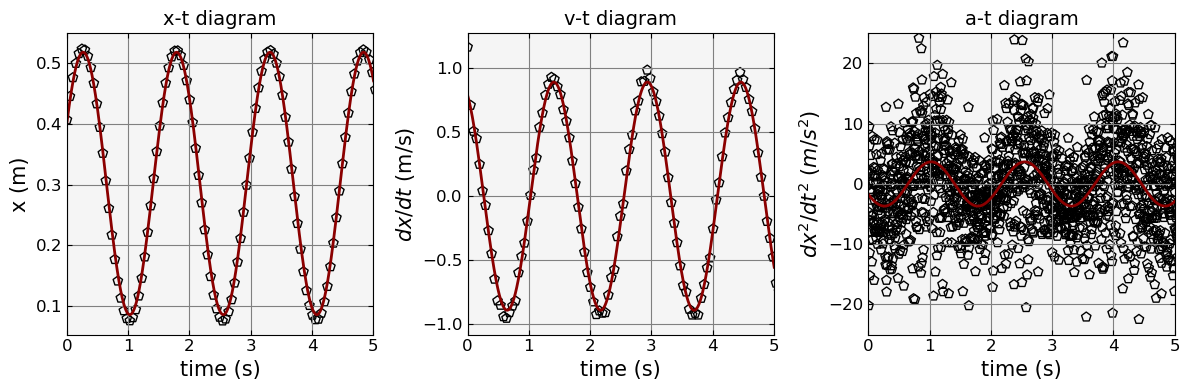

In [22]:
der1 = np.gradient(x,t)
der2 = np.gradient(der1,t)

fig,axes=plt.subplots(1,3,figsize=(12,4))
axes[0].scatter(t[::15],x[::15],color = 'black', s = 50, marker ='p',ec='black',fc='none') #plot every tenth datapoint [::10]
axes[0].plot(t,sinus_model(t,*popt),color='darkred',lw=2)

axes[1].scatter(t[::15], der1[::15], color='black', s = 50, marker ='p',ec='black',fc='none')
axes[1].plot(t,popt[2]*popt[1]*np.cos(popt[2]*t+popt[3]),color='darkred',lw=2)

axes[2].scatter(t[::], der2[::], color='black', s = 50, marker ='p',ec='black',fc='none')
axes[2].plot(t,-popt[2]**2*popt[1]*np.sin(popt[2]*t+popt[3]),color='darkred',lw=2)

axes[2].set_ylim(-25,25)
axes[0].set_title('x-t diagram',fontsize=14)
axes[1].set_title('v-t diagram',fontsize=14)
axes[2].set_title('a-t diagram',fontsize=14)

for i in range(3):
    axes[i].set_xlim(0,5)
    axes[i].set_xlabel('time (s)',fontsize=15)
    axes[i].tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
    axes[i].set_facecolor('whitesmoke')
    axes[i].grid(True,color='gray')

axes[0].set_ylabel('x (m)',fontsize=15)
axes[1].set_ylabel(r'$dx/dt$ (m/s)',fontsize=15)
axes[2].set_ylabel(r'$dx^2/dt^2$ $(m/s^2)$',fontsize=15)
plt.tight_layout()
plt.show()

# location='user_defined_location'
# plt.savefig('location'+'simple_pendulum.svg')

# Your Experiment starts here

* Author: Student name.
* Date: Date.
* About: Your experiment.<br>
* TA: 

Please ask your TA if you need to hand in your code at the end of the practical course.